In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import math
import random
import pandas as pd

# ignore warnings for video codecs
import warnings
warnings.filterwarnings('ignore')

In [6]:
def polygon(sides, radius=1, rotation=0, translation=None):
    '''
    https://stackoverflow.com/questions/23411688/drawing-polygon-with-n-number-of-sides-in-python-3-2
    '''
    one_segment = math.pi * 2 / sides

    points = [
        (round(
            math.sin(one_segment * i + rotation) * radius, 
            2),
         round(
             math.cos(one_segment * i + rotation) * radius,
             2),
        )
        for i in range(sides)]

    if translation:
        points = [[sum(pair) for pair in zip(point, translation)]
                  for point in points]

    return points

In [7]:
def distance(coord1, coord2, frac=(2/3)):
    
    # Find the fraction of the distances between the two points
    h_distance = frac * (coord2[0] - coord1[0])
    v_distance = frac * (coord2[1] - coord1[1])
    
    # Add the distance to the starting point
    h_distance = h_distance + coord1[0]
    v_distance = v_distance + coord1[1]
    
    return((h_distance, v_distance))
    

In [8]:
def fractile(sides, size=10, frac=(2/3), points=100):
    # Create a polygon from a list of tuples
    shape = polygon(sides, radius=size, rotation=0, translation=0)
    
    #prime the loop with starting points
    coord1 = shape[0]
    coord2 = shape[random.randint(1,sides-1)]
    
    # Create fractal points
    for i in range(1,points):
        # gett a new point that is a fraction of the distance between the two points
        new_point = distance(coord1, coord2, frac=frac)
        shape.append(new_point)
        
        # update coordinates
        coord1 = new_point
        coord2 = shape[random.randint(0,sides-1)]
    
    fig = plt.figure
    plt.figure(figsize=(10,10))
    x,y = zip(*shape)
    
    plt.scatter(x, y)
    plt.show()
    
    return None

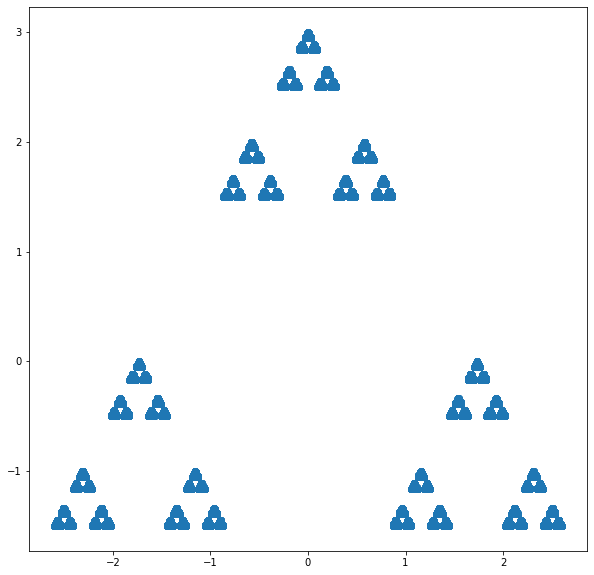

In [8]:
%matplotlib inline
tri = fractile(sides=3, size=3, frac=(2/3), points=100000)

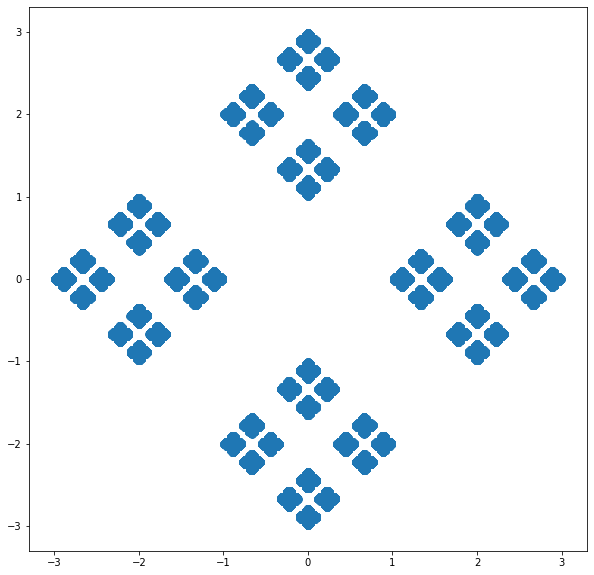

In [9]:
%matplotlib inline
squaare = fractile(sides=4, size=3, frac=(2/3), points=100000)

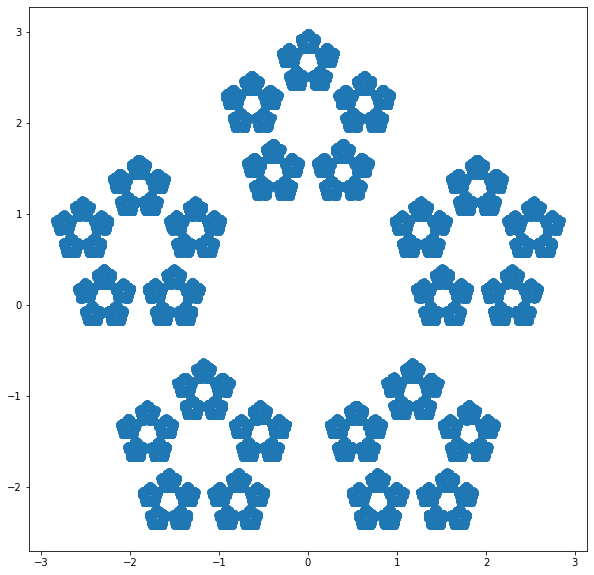

In [10]:
%matplotlib inline
penta = fractile(sides=5, size=3, frac=(2/3), points=100000)

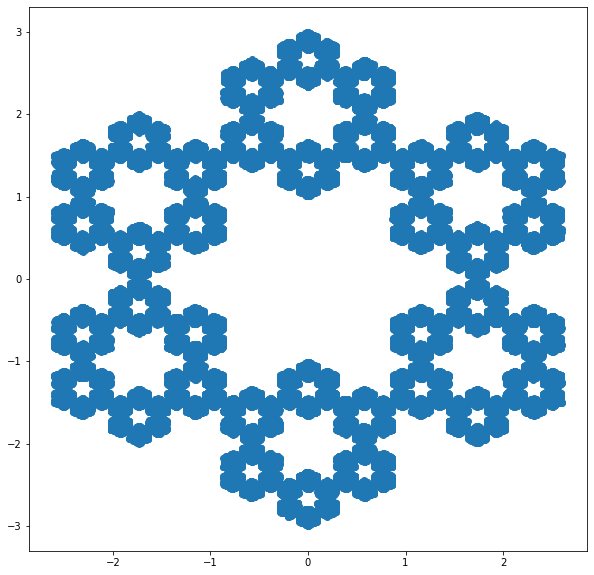

In [11]:
%matplotlib inline
hexa = fractile(sides=6, size=3, frac=(2/3), points=100000)

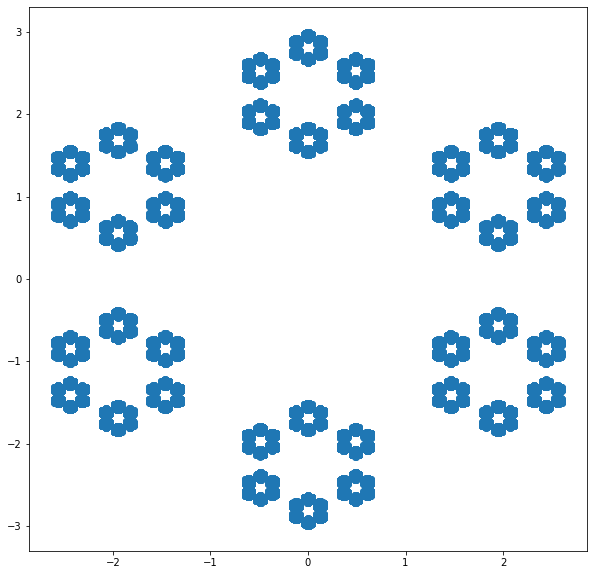

In [12]:
%matplotlib inline
hexa = fractile(sides=6, size=3, frac=(3/4), points=100000)

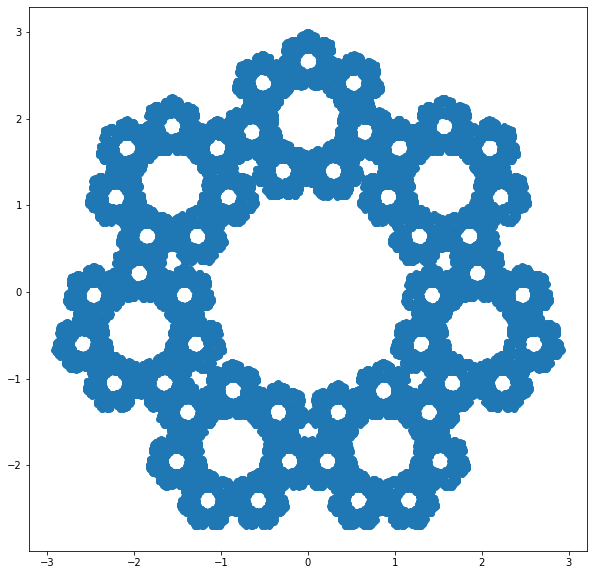

In [13]:
%matplotlib inline
septa = fractile(sides=7, size=3, frac=(2/3), points=100000)

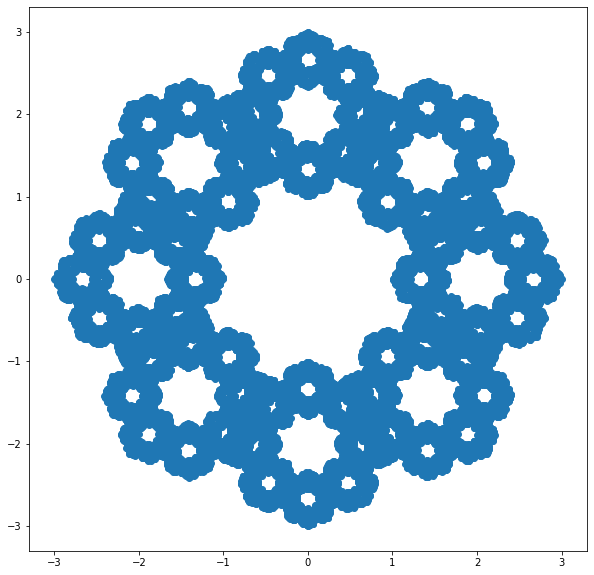

In [14]:
%matplotlib inline
octa = fractile(sides=8, size=3, frac=(2/3), points=100000)

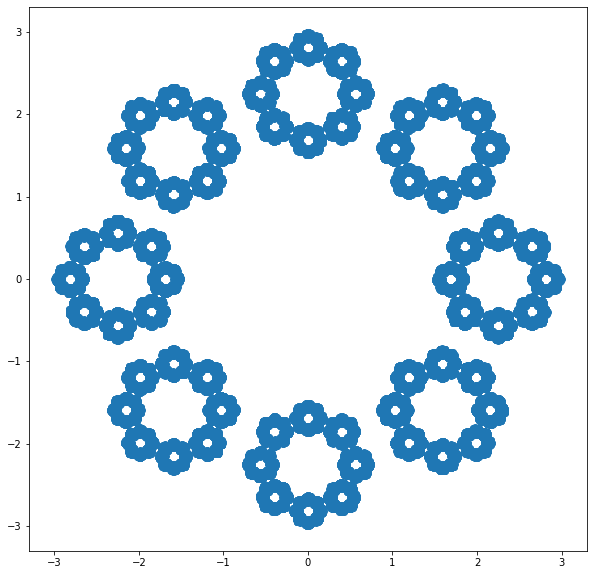

In [15]:
%matplotlib inline
octa = fractile(sides=8, size=3, frac=(3/4), points=100000)

# Create Animation

## Using Celluloid Camera (point by point)

In [65]:
#!pip install celluloid
from celluloid import Camera
'''
Using the Celluloid package for ease of use
https://stackoverflow.com/questions/26892392/matplotlib-funcanimation-for-scatter-plot
'''

def fractile_gif(sides, size=10, frac=(2/3), points=100):
    # Create a polygon from a list of tuples
    shape = polygon(sides, radius=size, rotation=0, translation=0)
    
    #prime the loop with starting points
    coord1 = shape[0]
    coord2 = shape[random.randint(1,sides-1)]
    
    # Initiate base figure
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    camera = Camera(fig)
    x,y = zip(*shape)
    
    # Append the base image
    plt.scatter(x,y, color="black")
    plt.axis('off')
    camera.snap()
    
    # Create fractal points
    for i in range(1,points):
        
        # get a new point that is a fraction of the distance between the two points
        new_point = distance(coord1, coord2, frac=frac)
        shape.append(new_point)
        
        # Append and graph
        x,y = zip(*shape)
        plt.scatter(x,y, color="black")
        plt.axis('off')
        camera.snap()
        
        # update coordinates
        coord1 = new_point
        coord2 = shape[random.randint(0,sides-1)]
    
    anim = camera.animate(interval=1)
    
    return anim
    

### Animate
Points > 2000 take a while to generate animations and even longer to save

<IPython.core.display.Javascript object>


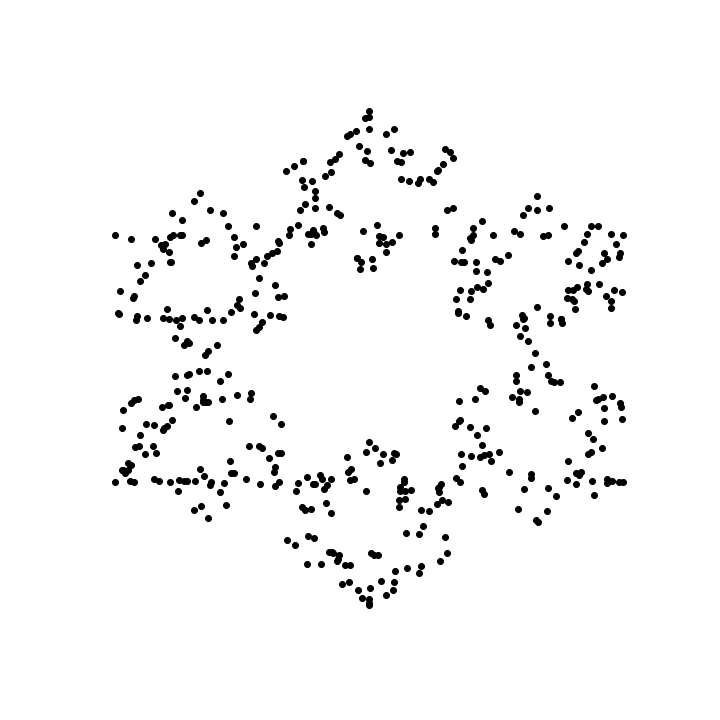

In [68]:
%matplotlib notebook
hexa = fractile_gif(sides=6, size=3, frac=(2/3), points=1000) 

### Save the animation

In [71]:
#hexa.save("hexa.gif", writer=PillowWriter(fps=120))

## Using Seaborn and FuncAnimation and slices of 50

In [21]:
import seaborn as sns
from matplotlib.animation import FuncAnimation

def fractile_sns_gif(sides, size=10, frac=(2/3), points=100):
    
    fig, ax = plt.subplots(figsize = (8, 8))
    
    # Create a polygon from a list of tuples
    shape = polygon(sides, radius=size, rotation=0, translation=0)
    
    #prime the loop with starting points
    coord1 = shape[0]
    coord2 = shape[random.randint(1,sides-1)]
    x,y = zip(*shape)
     
    # Create fractal points
    for i in range(1,points):

            # get a new point that is a fraction of the distance between the two points
            new_point = distance(coord1, coord2, frac=frac)
            shape.append(new_point)
            # Append and graph
            x,y = zip(*shape)

            # update coordinates
            coord1 = new_point
            coord2 = shape[random.randint(0,sides-1)]
            
    df = pd.DataFrame(shape, columns =['x_cord', 'y_cord'])
    
    # animation from pandas df
    slice_by = 50
    def animate(i):
        ax.cla()
        sns.scatterplot(x = 'x_cord',
                        y = 'y_cord',
                        data = df.loc[0:i*slice_by,], #iterate in slices
                        ax = ax,
                       linewidth = 0)
        # Hide Axis
        ax.set(yticklabels=[])
        ax.tick_params(left=False)
        ax.set(xticklabels=[])
        ax.tick_params(bottom=False)
        ax.set(ylabel=None)
        ax.set(xlabel=None)
        
        # Set Frame size
        ax.set_ylim(-size, size)
        ax.set_xlim(-size, size)
        
    fr = int(len(df)/slice_by) # get the number of frames
    anim = FuncAnimation(fig = fig, func = animate, frames = fr, interval = 1)

    return anim

### Animate
Points > 10,000 take a while to generate animations and even longer to save

<IPython.core.display.Javascript object>


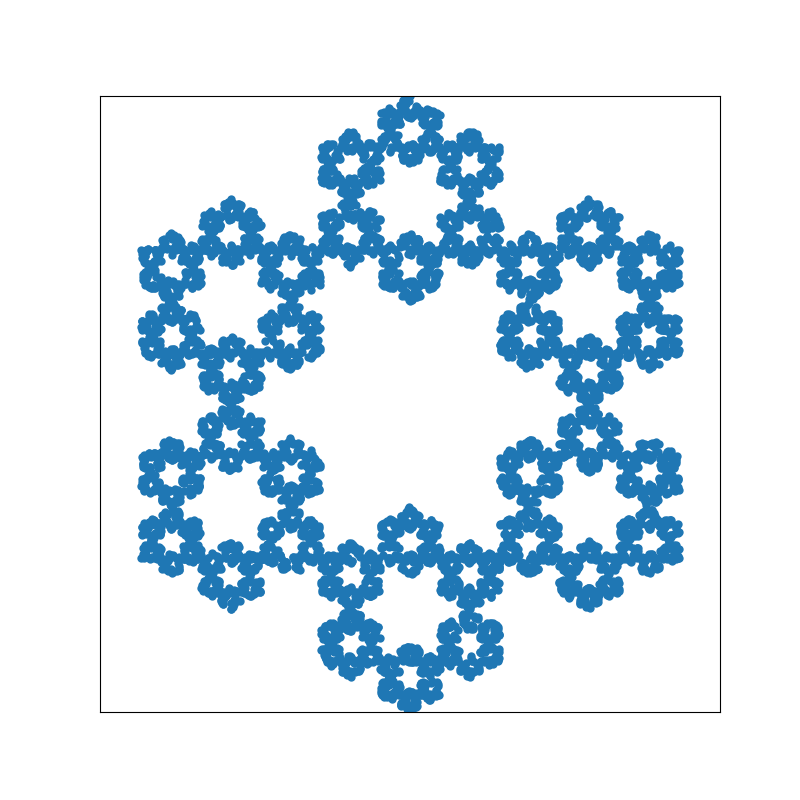

In [25]:
%matplotlib notebook
hexa_sns = fractile_sns_gif(sides=6, size=3, frac=(2/3), points=10000)

### Save the animation

In [26]:
#hexa_sns.save("hexa_sns.gif", writer=PillowWriter(fps=120))